# This is what i add to this file remove dates


In [1]:
def remove_dates(text):
    
    months=['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Août','Septembre','Octobre','Novembre','Décembre']
    for month in months:
        text = text.replace(month.lower(), '')
        text = text.replace(month, '')
    
    dates = None
    try:
        pattern = re.compile(r'[0-9][0-9]+')
        dates = pattern.findall(text)
        for date in dates:
            text = text.replace(date, '')
    except Exception as e:
        pass
    dates

    
    return text


In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter  
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import BytesIO
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO 
#from docx import Document



def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec='ascii', laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str 

def read_file(fileName):
  extension = fileName.split(".")
  extension = extension.pop()
  if extension == "pdf":
    #try:
       return convert_pdf_to_txt(fileName) #call to the conversion function pdftotxt
    #except:
       #return ''
       #pass
  else:
    print ('Unsupported format')
  return '', ''
  




In [3]:
useful_entities = []
filepath = 'titres_utiles.txt'
with open(filepath, encoding='utf-8') as fp:
   line = fp.readline()
   cnt = 1
   while line:
       useful_entities.append(str.lower(line.strip()))
       line = fp.readline()
       cnt += 1
print(useful_entities)


unnecessary_entities = []
filepath = 'titres_inutiles.txt'
with open(filepath, encoding='utf-8') as fp:
   line = fp.readline()
   cnt = 1
   while line:
       unnecessary_entities.append(str.lower(line.strip()))
       line = fp.readline()
       cnt += 1
print(unnecessary_entities)

['education', 'formations', 'formation', 'diplômes', 'diplomes', 'formations académiques', 'formations academiques', 'formation et diplômes', 'formation et diplomes', 'diplômes et formations', 'diplomes et formations', 'diplômes & formations', 'diplomes & formations', 'parcours de formation', 'études et diplômes', 'etudes et diplomes', 'logiciels', 'qualités', 'qualites', 'qualites', 'informatique', 'outil informatique', 'expériences professionnelles', 'experiences professionnelles', 'expériences', 'experiences', 'expériences pro', 'experiences pro', 'projets & expériences professionnelles', 'projets & experiences professionnelles', 'expérience', 'experience', 'experience professionnelle', 'experience associative', 'experiences techniques', 'expérience', 'experience', 'compétences', 'competences', 'compétences technique', 'competences technique', 'compétences informatiques', 'competences informatiques', 'compétences linguistiques', 'competences linguistiques', 'compétences linguistique

In [4]:
#!/usr/bin/env python

import nltk 
import codecs
import string
from nltk.tokenize import sent_tokenize, word_tokenize, line_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords


#Tokenizing Words , lines and Sentences

def get_lines(text):
    return line_tokenize(text)
def get_words(text):
    return word_tokenize(text)
def get_sentence(text):
    return sent_tokenize(text)
# remove punctuation and stop words french

'''A stop word is a commonly used word (such as “un”, “j'ai”, “avec”, “et”) 
that a search engine has been programmed to ignore'''

def removePunct(text_string):
    #text_string = (text.encode('ascii', errors='ignore')).decode("utf-8")
    text_string=text_string.replace("\n"," ")
    text_string=text_string.replace("\uf0b7"," ")
    text_string=text_string.replace("\x0c"," ")
    text_string=text_string.replace("\t"," ")
    text_string=text_string.replace("\x0b"," ")
    text_string=text_string.replace("\r"," ")
    text_string=text_string.replace("\f"," ")
    
    text_string=text_string.replace("’"," ")
    
    text_string=text_string.replace("\u200b"," ")
    text_string=text_string.replace("\uf020"," ")
    text_string=text_string.replace("\uf02d"," ")
     
    
    
    for i in text_string:
        if i in string.punctuation:
            text_string=text_string.replace(i," ")
    words = get_words(text_string.lower())
    return ' '.join(words)
def stopword(text) :
    words = set(stopwords.words('french'))
    word_tokens= [w for w in get_words(text) if not w in words]
    return word_tokens

#Stemming

'''
Stemming is the process of reducing a word into its stem, i.e. its root form.
Stemmers remove morphological affixes from words, leaving only the word stem.

'''
def stemmers(text):
    stemmer = SnowballStemmer("french")
    w=get_words(text)
    w = [stemmer.stem(word) for word in w]
    return ' '.join(w)
#text net

def net_text(text) :
    doc = removePunct(text)
    doc = ' '.join(stopword(doc))
    return doc

In [5]:
#!/usr/bin/env python

# import the necessary libraries
import os, re, sys

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir)))
# from commun.process_text import *
# diri=os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir))
# # open the file that contains the useful entities
# useful_entities = open(diri+'/util/data/useful_entities.txt', 'r').read().lower()
# # open the file that contains unnecessary entities
# unnecessary_entities = open(diri+'/util/data/unnecessary_entities.txt', 'r').read().lower()


# this function return a list of entity indexes

def get_index(text):
    lines = get_lines(text.lower())
    all_index = []
    for i in lines:
        if len(i) >= 5:
            index = lines.index(i)
            if (i in useful_entities + unnecessary_entities) and (index not in all_index):
                all_index.append(index)
    return all_index


# this function returns a matrix of two columns contains indeces that surround the unnecessary entities
def get_other_index(text):
    all_index = get_index(text)
    lines = get_lines(text.lower())
    index_other = []
    for i in range(len(all_index) - 1):
        m = all_index[i]
        f = all_index[i + 1]
        
#         if lines[m] in unnecessary_entities.split(' , '):
        if lines[m] in unnecessary_entities:
            index_other.append([m, f])
#         elif lines[m] in unnecessary_entities.split(', '):
        elif lines[m] in unnecessary_entities:
            index_other.append([m, f])
#         elif lines[m] in unnecessary_entities.split(' ,'):
        elif lines[m] in unnecessary_entities:
            index_other.append([m, f])
    return index_other


# this function remove the unnecessary entities
def remove_entities(text):
    lines = get_lines(text.lower())
    index_other = get_other_index(text)
    for k in range(len(index_other)):
        liste = index_other[k]
        del lines[liste[0]:liste[1]]
    return lines


def remove_email(text):
    emails = None
    try:
        pattern = re.compile(r'\S*@\S*')
        emails = pattern.findall(text)
        for email in emails:
            text = text.replace(email, '')
    except Exception as e:
        pass

    return text

def remove_dates(text):
    
    months=['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Août','Septembre','Octobre','Novembre','Décembre']
    for month in months:
        text = text.replace(month.lower(), '')
        text = text.replace(month, '')
    
    dates = None
    try:
        pattern = re.compile(r'[0-9][0-9]+')
        dates = pattern.findall(text)
        for date in dates:
            text = text.replace(date, '')
    except Exception as e:
        pass
    dates

    
    return text


def remove_phone(text):
    number = None
    try:
        pattern = re.compile(
            r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)')
        match = pattern.findall(text)
        match = [re.sub(r'[,.]', '', el) for el in match if len(re.sub(r'[()\-.,\s+]', '', el)) > 6]
        match = [re.sub(r'\D$', '', el).strip() for el in match]
        match = [el for el in match if len(re.sub(r'\D', '', el)) <= 15]
        try:
            for el in list(match):
                if len(el.split('-')) > 3: continue  # Year format YYYY-MM-DD
                for x in el.split("-"):
                    try:
                        if x.strip()[-4:].isdigit():
                            if int(x.strip()[-4:]) in range(1900, 2100):
                                match.remove(el)
                    except:
                        pass
        except:
            pass
        number = match
        for n in number:
            text = text.replace(n, '')
    except:
        pass
    return text


def ie_preprocess(document):
    document = ' '.join(stopword(document))
    sentences = get_sentence(document)
    sentences = [get_words(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences


def remove_names(lines):
    names = []
    test = 1
    text = ' '.join(lines)
    with codecs.open('names.txt', 'r', encoding='utf8') as f:
        names = f.read().lower().split(' , ')
    try:
        for i in lines:
            words = word_tokenize(i.lower())
            if len(words) <= 3:
                for j in words:
                    if len(j) >= 4:
                        if j in names:
                            lines.remove(i)
                            text = ' '.join(lines)
                            test = 0
        if test == 1:
            sentences = ie_preprocess(text)
            for tagged_sentence in sentences:
                for chunk in nltk.ne_chunk(tagged_sentence):
                    if type(chunk) == nltk.tree.Tree and chunk.label() == 'PERSON':
                        names.append(' '.join([c[0] for c in chunk]))
            for n in names:
                text = text.replace(n, '')
    except:
        pass
    return text

#### to parse the name
#in the original code the purpose was to delete name... I edit this function
def find_name(text):
    names = []
    founded_name=''
#     test = 1
#     text = ' '.join(lines)
    with codecs.open('names.txt', 'r', encoding='utf8') as f:
        names = f.read().lower().split(' , ')
    try:
        for i in lines:
            words = word_tokenize(i.lower())
            if len(words) <= 3:
                for j in words:
                    if len(j) >= 4:
                        if j in names:
                            #founded_name=i
                            lines.remove(i)
                            text = ' '.join(lines)
                            test = 0
        if test == 1:
            sentences = ie_preprocess(text)
            for tagged_sentence in sentences:
                for chunk in nltk.ne_chunk(tagged_sentence):
                    if type(chunk) == nltk.tree.Tree and chunk.label() == 'PERSON':
                        names.append(' '.join([c[0] for c in chunk]))
            for n in names:
                text = text.replace(n, '')
    except:
        pass
    return text

#####


def cv_cleaner(text):
    lines = remove_entities(text)
    doc = ' '.join(lines)
    doc = remove_names(lines)
    doc1 = remove_phone(doc)
    doc2 = remove_email(doc1)
    doc3=remove_dates(doc2)
    w = net_text(doc3)
    return w

In [6]:
cv_cleaner(convert_pdf_to_txt('CV.pdf'))

'formation cours cycle ingénieur etat a institut nationale statistique economie appliquée option recherche opérationnelle aide décision centre classes préparatoires grandes ecoles marrakech lycée ibn timiya filière mathématiques physique obtention baccalauréat sciences mathématiques b experience professionnele stage enquête nationale conjoncture auprès ménages sein direction régionale haut commissariat plan marrakech competences statistique inférence statistique analyse régression anova séries temporelles analyse données economie finance econométrie microéconomie macroéconomie gestion portefeuilles economie entreprises comptabilité nationale comptabilité générale recherche opérationnelle programmation linéaire programmation non linéaire processus stochastiques chaines markov fiabilité ntenance contrôle qualité file attente théorie graphes gestion stock production simulation évènements discrets informatique python beautifulsoup pandas numpy sikit learn matplotlib… r spss matlab scilab p

# The test of KNN


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [8]:
import numpy as np

## A database for testing using 10 CVs

In [9]:
# ###################################################### forget about this

# L=[]
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (1).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (2).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (3).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (4).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (5).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\info (6).pdf")))

# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\comm (1).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\comm (2).pdf")))

# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\marketing (1).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\marketing (2).pdf")))

# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\mecanique.pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\mecanique (1).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\mecanique (2).pdf")))
# L.append(cv_cleaner(convert_pdf_to_txt("some_CVs\mecanique (3).pdf")))


# len(L)


In [10]:
# # Categories_numbers=['informatique','Marketing','Mecanique']

# # D=6*['informatique']+4*['Marketing']+4*['Mecanique']
# Y_train=np.array(6*[0]+4*[1]+4*[2])
# Y_train
# type(Y_train[0])

## Importing Real Database and creating a new col for the clean text

In [11]:
import pandas as pd 

data=pd.read_excel("donnees.xlsx")
data['Texte_CV']=' '
data.head()

# intialise data of lists. 
# data = {'CV':L, 'Domaine':D} 
  
# Create DataFrame 
# df = pd.DataFrame(data) 
  
# Print the output. 
#print(df) 

,CV,Domaine,Texte_CV
0,cv651,Informatique,
1,cv255,Informatique,
2,cv592,Informatique,
3,cv593,Informatique,
4,cv594,Informatique,


### Cleaning each CV

In [12]:
for i in range(0,len(data)):
    data['Texte_CV'][i]=cv_cleaner(convert_pdf_to_txt("C:\\Users\\Anonymous\\Desktop\\data_cv_training\\"+data['CV'][i]+".pdf"))
data.head()

,CV,Domaine,Texte_CV
0,cv651,Informatique,ingénieur développement java jee api micro ser...
1,cv255,Informatique,plus informations bienvenue www zakariadalil c...
2,cv592,Informatique,né adresse bardo tunisie tel el linked mahfoud...
3,cv593,Informatique,1 rue pasteur bourg reine cid 6 cid cid gpg id...
4,cv594,Informatique,h benjrad ans célibataire el ingénieur a école...


### make sure that the X input of your KNN model should be an array

In [13]:
type(data['Texte_CV'].values)

numpy.ndarray

### Transforming the X to a numerical vector

In [14]:
# ##################################################### for test only

# # Builds a dictionary of features and transforms documents to feature vectors and convert our text documents to a
# # matrix of token counts (CountVectorizer)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(L)
# # transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_tfidf.shape

In [15]:
# Builds a dictionary of features and transforms documents to feature vectors and convert our text documents to a
# matrix of token counts (CountVectorizer)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data['Texte_CV'])

In [16]:
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(73, 7720)

### The Y also should be numerical value, so we will assign to each value a number

In [17]:
data['Domaine'].unique()


array(['Informatique', 'Logistique', 'Mecanique', 'Economie', 'Commerce',
       'Juridique', 'RH'], dtype=object)

In [18]:
Categories_numbers=['Informatique', 'Logistique', 'Mecanique', 'Economie', 'Commerce','Juridique', 'RH']
#create new col for number o each category
data['Domaine_number']=' '
for i in range(0,len(data)):
    data['Domaine_number'][i]=Categories_numbers.index(data['Domaine'][i])
data.tail()
# D=6*['informatique']+4*['Marketing']+4*['Mecanique']
#be careful, it should be a numpy.int type not o native int
Y_train=np.array(np.int32(data['Domaine_number'].values))
# Y_train.shape
type(Y_train[0])
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 5, 2, 0, 0, 4, 4, 4, 4, 5, 5, 5, 5,
       6, 4, 5, 5, 5, 5, 5, 5, 2, 2, 3, 4, 6, 1, 1, 1, 1, 4, 2, 2, 2, 2,
       2, 2, 6, 6, 6, 6, 6])

#### difference between int and native int ...

In [19]:

type(np.int32(12))
# Y_train=np.array(np.int32(data['Domaine_number'][1])
Y=np.array(np.int32([1]*73))
type(Y[0])

numpy.int32

## Training KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)

# training our classifier ; train_data.target will be having numbers assigned for each category in train data
clf = knn.fit(X_train_tfidf,Y_train)



## Predict some CV

In [21]:
# Input Data to predict their classes of the given categories
docs_new = ['Marketing est un domaine tres communicant', 'Java est mecanique programme bon',cv_cleaner(convert_pdf_to_txt("cv211.pdf"))]
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)


predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, Categories_numbers[category]))

'Marketing est un domaine tres communicant' => Commerce
'Java est mecanique programme bon' => Informatique
'projet mba management sport alternance win sport school o p é e e capacité apprentge rigoureux dynamique sérieux autonome orgé capacité triller équipe capacité encadrer former e x p é r i e e p r o f e i o e e service civique cjb handball entraînements participation stages perfectionnement présence weekends compétitions développement filière féminine intersport reze oceane vendeur chaussures sports collectifs conseil client mise rayon implantation rayon traitement produit inté leclerc drive atlantis réapprovisionnement racks livraison client préparation commande formation nouveaux intéaires f o r a i o ufr staps nantes licence 3 formation cours spécité education motricité obtention deug staps licence 2 équivalant bafa lycée colinière nantes bac stmg mention assez bien spécité gestion finance interne durant toute période lycée o a h a e e u i a h a b a e u r e h a u i v e a u p a 

## Test and accuracy

#### This code will read the test BD, create a colomn for the CV text, clean the CV, than vectorize the text 

##### it's so important that u dont create a new object(for transforming anf tf-idf ), u should work with the same one,,,,,

In [22]:
#load
test_data=pd.read_excel("test_BD.xlsx")
test_data['Texte_CV']=' '
#data.head()

#clean
for i in range(0,len(test_data)):
    test_data['Texte_CV'][i]=cv_cleaner(convert_pdf_to_txt("C:\\Users\\Anonymous\\Desktop\\data_cv_training\\"+test_data['CV'][i]+".pdf"))
test_data.head()

#vectorize tf-idf

######################### it's so important that u dont create a new object, u should work with the same one,,,,,

#count_vect = CountVectorizer()
X_test_counts = count_vect.transform(test_data['Texte_CV'])
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
# tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape



#create new col for number o each category
test_data['Domaine_number']=' '
for i in range(0,len(test_data)):
    test_data['Domaine_number'][i]=Categories_numbers.index(test_data['Domaine'][i])
data.tail()

#be careful, it should be a numpy.int type not o native int
Y_test=np.array(np.int32(test_data['Domaine_number'].values))
# Y_train.shape
#type(Y_test[0])
Y_test


array([6, 6, 6, 1, 1, 2, 2, 5, 5, 4, 4, 3, 3, 0, 0])

In [23]:
X_test_tfidf.shape
X_train_tfidf.shape

(73, 7720)

### Now we will predict the "Domaines" of each CV in data_test, and than we will calculate the mean of true predicted one

In [24]:
# test_data = fetch_20newsgroups(subset='test',
#                                categories=categories, shuffle=True, random_state=42)
# docs_test = test_data.data

# Predicting our test data
predicted = clf.predict(X_test_tfidf)
print('We got an accuracy of',np.mean(predicted == Y_test)*100, '% over the test data.')

We got an accuracy of 86.66666666666667 % over the test data.


In [25]:
predicted = clf.predict(X_test_tfidf)
predicted

array([6, 6, 6, 1, 1, 2, 0, 5, 5, 4, 4, 3, 6, 0, 0])

In [26]:
Y_test

array([6, 6, 6, 1, 1, 2, 2, 5, 5, 4, 4, 3, 3, 0, 0])

# Choosing the optimal K value

In [50]:
len(data)
L=np.arange(1,6)
L=np.zeros(4)
L


array([0., 0., 0., 0.])

In [57]:
from matplotlib import pyplot as plt

In [66]:
#for example lets try all those value of K
Ks=int(len(data)/2)
# Ks=len(data)
#np array to store accuracy
accuracy=np.zeros(Ks-1)

for k in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    # training our classifier ; train_data.target will be having numbers assigned for each category in train data
    clf = knn.fit(X_train_tfidf,Y_train)
    # Predicting our test data
    predicted = clf.predict(X_test_tfidf)
#   print('We got an accuracy of',np.mean(predicted == Y_test)*100, '% over the test data.')
    accuracy[k-1]=np.mean(predicted == Y_test)*100
    


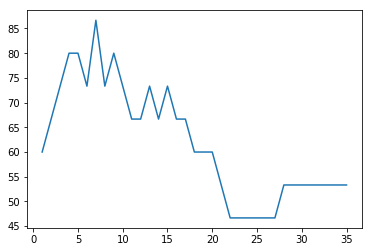

In [67]:
K=np.arange(1,Ks)
plt.plot(K,accuracy)
plt.show()

In [68]:
print(accuracy.max())
print('La valeur optimale de K est :',accuracy.argmax()+1)

86.66666666666667
La valeur optimale de K est : 7
